In [84]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Importing dataset
carData=pd.read_csv('/content/drive/My Drive/data.csv')
carData.head()

In [ ]:
#Data types
carData.dtypes

In [ ]:
#Statistical summary
carData.describe()

In [ ]:
#Shape
carData.shape

In [ ]:
#NULL values
d=carData.isnull().sum()
d

From the above output we can clearly see that there are maximum number of null values in the 'Market Category' column. Thus, for the ease of things we opt to remove it from the labelled columns. Also, we see that various more parameters do not have much significance in determining the prices of the cars. Thus dropping those columns won't make much of a difference in the processing of the model.

In [ ]:
#Eliminating the insignificant columns
carData = carData.drop(['Engine Fuel Type','Number of Doors','Market Category'], axis = 1)
carData.head()

In [ ]:
carData.shape

In [92]:
carData.rename(columns = { "Engine HP": "HP", "Engine Cylinders": "Cylinders",
                          "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H",
                          "city mpg": "MPG-C", "MSRP": "Price"}, inplace = True) 

In [ ]:
carData.drop_duplicates()

In [ ]:
#NULL values
print(carData.isnull().sum())

In [ ]:
carData=carData.dropna()
carData.count()

In [ ]:
carData.isnull().sum()

In [ ]:
#Plotting graphs of Data (Columns)
sns.boxplot(x=carData['HP'])

In [ ]:
sns.boxplot(x=carData['Cylinders'])

In [ ]:
sns.boxplot(x=carData['MPG-H'])

In [ ]:
sns.boxplot(x=carData['MPG-C'])

In [ ]:
sns.boxplot(x=carData['Popularity'])

In [ ]:
sns.boxplot(x=carData['Price'])

In [ ]:
q1=carData.quantile(0.25)
q3=carData.quantile(0.75)
iqr=q3-q1
iqr

In [104]:
carData=carData[~((carData<(q1-1.5*iqr))|(carData>(q3+1.5*iqr))).any(axis=1)]

In [ ]:
carData.shape

In [ ]:
#Percentage of car per brand
counts=carData['Make'].value_counts()*100/sum(carData['Make'].value_counts())
#Top 10 popular brands
popularCars=counts.index[:10]
#Plotting the bar plot
plt.figure(figsize=(10,5))
plt.bar(popularCars,height=counts[:10])
plt.title('Top 10 car Brands')
plt.show()

In [ ]:
prices=carData[['Make','Price']].loc[(carData['Make']=='Chevrolet')|
                                     (carData['Make']=='Volkswagen')|
                                     (carData['Make']=='Toyota')|
                                     (carData['Make']=='Nissan')|
                                     (carData['Make']=='GMC')|
                                     (carData['Make']=='Dodge')|
                                     (carData['Make']=='Mazda')|
                                     (carData['Make']=='Honda')|
                                     (carData['Make']=='Suzuki')|
                                     (carData['Make']=='Infiniti')].groupby('Make').mean()
prices

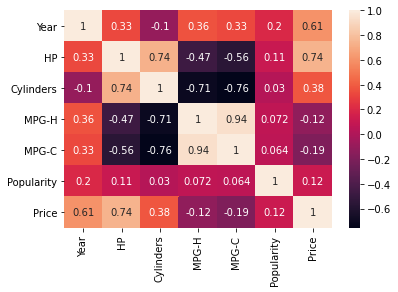

In [111]:
#Correlation Matrix
corrMatrix=carData.corr()
sns.heatmap(corrMatrix,annot=True)

# From the heatmap plotted above, it can be concluded that:

**>>> Price is positively dependent on features and Horse Power(HP) and Year**

**>>> The features HP and Cylinders are positively dependent on each other**

i.e. if number of Cylinders are increased, the HP also increases.

**>>>MPG-H and MPG-C have strong negative correlation with Cylinders.**

i.e. if number of cylinders are increased, MPG-H and MPG-C decreases.

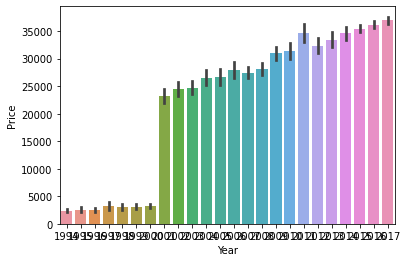

In [115]:
sns.barplot(carData['Year'],carData['Price'])

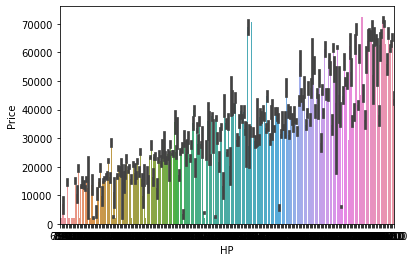

In [114]:
sns.barplot(carData['HP'],carData['Price'])

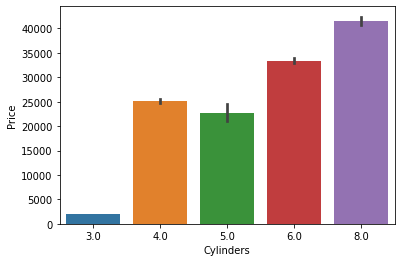

In [116]:
sns.barplot(carData['Cylinders'],carData['Price'])

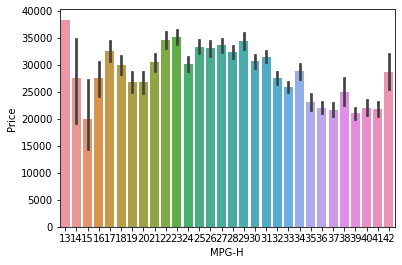

In [117]:
sns.barplot(carData['MPG-H'],carData['Price'])

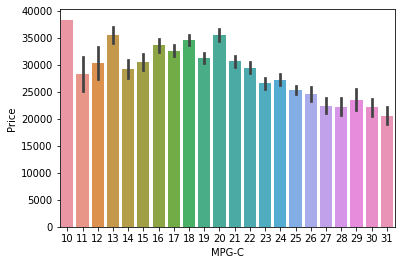

In [118]:
sns.barplot(carData['MPG-C'],carData['Price'])

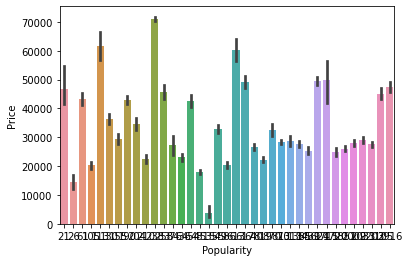

In [119]:
sns.barplot(carData['Popularity'],carData['Price'])